# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [70]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
raw_data = study_results.merge(mouse_metadata,on="Mouse ID", how="outer")

# Display the data table for preview
raw_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [52]:
# Checking the number of mice.
raw_data["Mouse ID"].value_counts()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [53]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = raw_data[raw_data.duplicated(subset=["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
587,g989,0,45.000000,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [54]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_rows = raw_data.loc[raw_data["Mouse ID"] == "g989"]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = raw_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [56]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# So there's no typos

drug = "Drug Regimen"
tumor_volume = "Tumor Volume (mm3)"
weight = "Weight (g)"

drug_list = clean_data.groupby([drug])[drug]
drug_means = clean_data.groupby([drug])[tumor_volume].mean()
drug_medians = clean_data.groupby([drug])[tumor_volume].median()
drug_variance = clean_data.groupby([drug])[tumor_volume].var()
drug_deviation = clean_data.groupby([drug])[tumor_volume].std()
drug_sem = clean_data.groupby([drug])[tumor_volume].sem()

drug_summary = pd.DataFrame({

    "Mean Tumor Volume": drug_means,
    "Median Tumor Volume": drug_means,
    "Tumor Volume Variance": drug_variance,
    "Tumor Volume Std. Dev.": drug_deviation,
    "Tumor Volume Std. Err.": drug_sem
})
drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

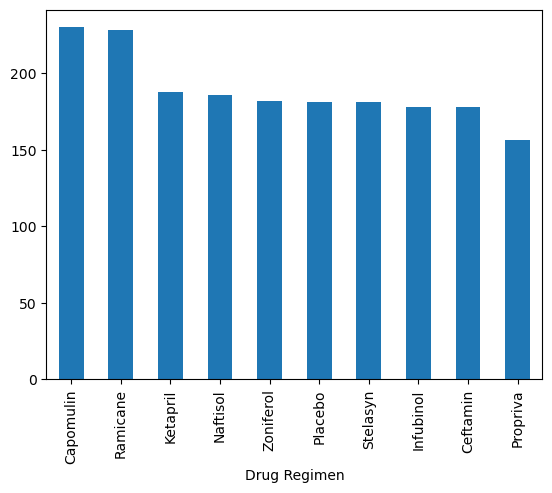

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data["Drug Regimen"].value_counts().plot(kind="bar")


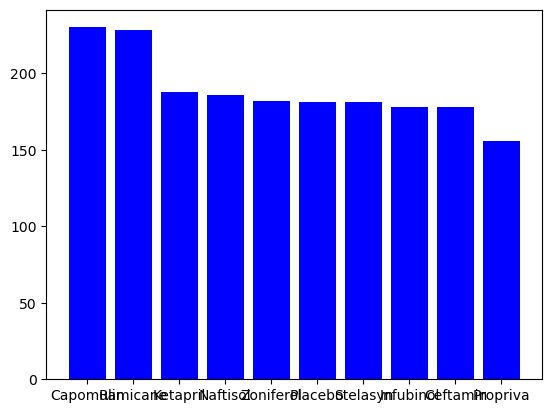

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_data["Drug Regimen"].value_counts().to_list()
x_axis = clean_data["Drug Regimen"].value_counts().index.to_list()

plt.bar(x_axis, y_axis, color="blue")
plt.show()

<Axes: ylabel='count'>

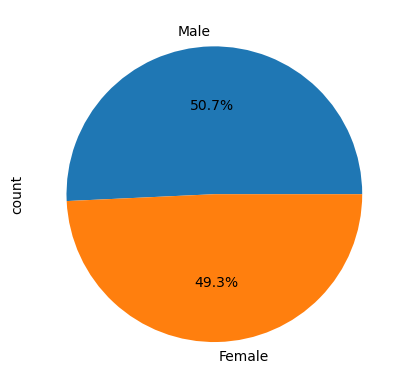

In [60]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
#unique_mice = clean_data["Sex"].value_counts.to_list
#unique_mice

# Make the pie chart
clean_data["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

In [61]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data["Sex"].value_counts().to_list
unique_mice

# Make the pie chart
#plt.plot(kind="pie")

<bound method IndexOpsMixin.tolist of Sex
Male      958
Female    930
Name: count, dtype: int64>

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_frame = last_timepoint.to_frame()
join_list = ["Mouse ID","Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_data = last_timepoint_frame.merge(clean_data,on=join_list, how="inner")
tumor_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list_2 = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_df = tumor_data[tumor_data["Drug Regimen"] == "Capomulin"]
ramicane_df = tumor_data[tumor_data["Drug Regimen"] == "Ramicane"]
infubinol_df = tumor_data[tumor_data["Drug Regimen"] == "Infubinol"]
ceftamin_df = tumor_data[tumor_data["Drug Regimen"] == "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin_iqr = capomulin_df[tumor_volume].quantile(0.75) - capomulin_df[tumor_volume].quantile(0.25)
ramicane_iqr = ramicane_df[tumor_volume].quantile(0.75) - ramicane_df[tumor_volume].quantile(0.25)
infubinol_iqr = infubinol_df[tumor_volume].quantile(0.75) - infubinol_df[tumor_volume].quantile(0.25)
ceftamin_iqr = ceftamin_df[tumor_volume].quantile(0.75) - ceftamin_df[tumor_volume].quantile(0.25)

# Determine outliers using upper and lower bounds
capomulin_upper = capomulin_df[tumor_volume].quantile(0.75) + 1.5*capomulin_iqr
capomulin_lower = capomulin_df[tumor_volume].quantile(0.25) - 1.5*capomulin_iqr
ramicane_upper = ramicane_df[tumor_volume].quantile(0.75) + 1.5*ramicane_iqr 
ramicane_lower = ramicane_df[tumor_volume].quantile(0.25) - 1.5*ramicane_iqr
infubinol_upper = infubinol_df[tumor_volume].quantile(0.75) + 1.5*infubinol_iqr
infubinol_lower = infubinol_df[tumor_volume].quantile(0.25) - 1.5*infubinol_iqr
ceftamin_upper = ceftamin_df[tumor_volume].quantile(0.75) + 1.5*ceftamin_iqr
ceftamin_lower = ceftamin_df[tumor_volume].quantile(0.25) - 1.5*ceftamin_iqr

#Outliers for each drug
capomulin_outliers = capomulin_df[(capomulin_df[tumor_volume] > capomulin_upper | capomulin_df[tumor_volume] < capomulin_lower)]
ramicane_outliers = ramicane_df[(ramicane_df[tumor_volume] > ramicane_upper | ramicane_df[tumor_volume] < ramicane_lower)]
infubinol_outliers = infubinol_df[(infubinol_df[tumor_volume] > infubinol_upper | infubinol_df[tumor_volume] < infubinol_lower)]
ceftamin_outliers = ceftamin_df[(ceftamin_df[tumor_volume] > ceftamin_upper | ceftamin_df[tumor_volume] < ceftamin_lower)]

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

TypeError: 'Axes' object is not subscriptable

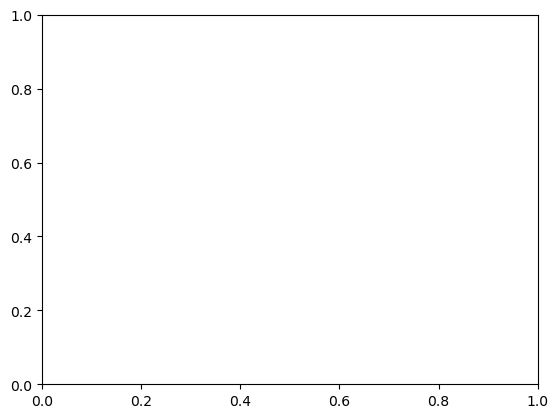

In [68]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# with an assist from copilot

fig, axs = plt.subplots(1,4)
capomulin_df[tumor_volume].plot(kind="box", ax=axs[0])
axs[0].set_title("Capomulin")
ramicane_df[tumor_volume].plot(kind="box", ax=axs[1])
axs[1].set_title("Ramicane")
infubinol_df[tumor_volume].plot(kind="box", ax=axs[2])
axs[2].set_title("Infubinol")
ceftamin_df[tumor_volume].plot(kind="box", ax=axs[3])
axs[3].set_title("Ceftamin")

## Line and Scatter Plots

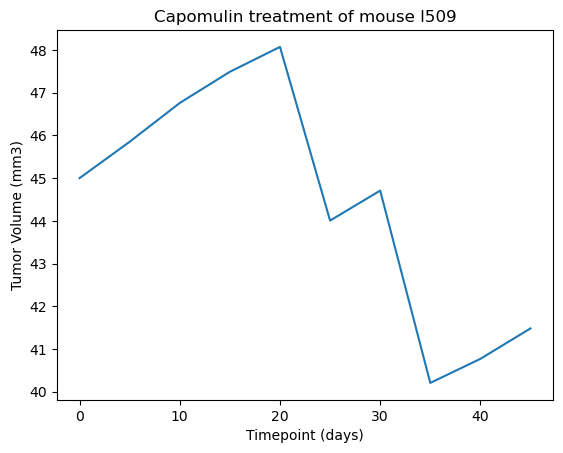

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


Text(0, 0.5, 'Average Tumor Volume (mm3)')

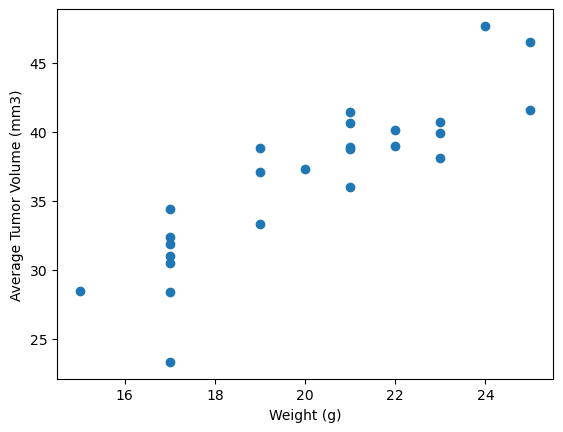

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Some things are from Copilot
x_values = capomulin_df[weight]
y_values = capomulin_df[tumor_volume]
plt.scatter(x_values, y_values)
plt.xlabel(weight)
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


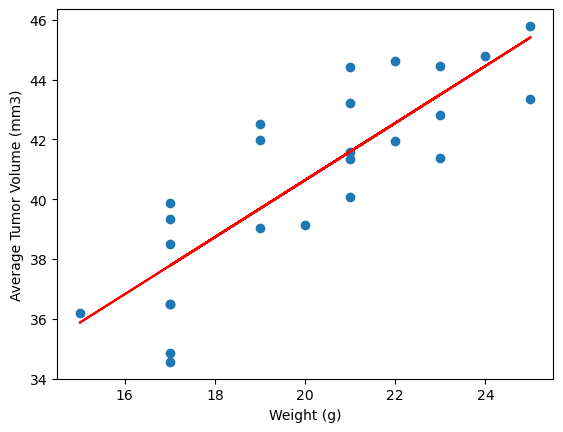

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_df[weight]
y_values = capomulin_df[tumor_volume]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel(weight)
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()